In [77]:
from IPython.display import clear_output
import time
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
fnameDC = 'C:\\Users\\racco\\Documents\\BOJCN7_232133.txt'
fnameMW = 'C:\\Users\\racco\\Documents\\BOJCN7_194357.txt'
fnameMW = 'C:\\Users\\racco\\Documents\\BOJCN7_171915.txt'

In [78]:
dataTime = np.loadtxt(fnameDC, skiprows=22, usecols=0)
dataFreq = np.loadtxt(fnameDC, skiprows=22, usecols=6)
dataCurr = np.loadtxt(fnameDC, skiprows=22, usecols=7)
dataVolt = np.loadtxt(fnameDC, skiprows=22, usecols=8)

# each IVc iteration has 77pts, 
# I from 0nA..15nA..0nA
# V from -752uV..-349uV..-752uV

In [79]:
def splitXc( dataX=dataFreq, dataY=dataCurr, dataZ=dataVolt, itid = 10, itc = 77, sweep = 0 ):
    iterStr = itid * itc
    iterEnd = iterStr + itc     

    if sweep == 0: #forward
        iterEnd = iterStr + int(np.ceil(itc/2))
    elif sweep == 1: #backward
        iterStr = iterStr + int(np.floor(itc/2))
    else: #full
        time.sleep(1e-6)
        
    return ( dataX[iterStr:iterEnd], dataY[iterStr:iterEnd], dataZ[iterStr:iterEnd], itid )   
        
def plotXc( dataX, dataY, dataZ, itid = 10):
    fig, ax = plt.subplots()
    shftdataZ = dataZ - dataZ.min()

    ax.plot(dataY, shftdataZ, '.-')
    ax.set(xlabel='Current (A)', ylabel='Voltage (V)', title='IVc @Freq= {}GHz, #{}'.format(dataX[0], itid))

    ax.grid()
    plt.show()
    time.sleep(.2)
    plt.close()
    
def searchXc( dataX, dataY, dataZ, Zthres = 50e-6):
    shftdataZ = dataZ - dataZ.min()

    return ( dataX[0] , dataY[np.argmin(abs(shftdataZ-Zthres))] )

def fitXc( sdata = splitXc(dataX=dataFreq, dataY=dataCurr, dataZ=dataVolt, itid = 20, itc = 77, sweep = 0), fitCurrList = np.arange(0, 15e-9, 1e-11)):
    rawCurr = sdata[1]
    rawVolt = sdata[2]
    f = interp1d( rawCurr, rawVolt )

    fitCurr = fitCurrList
    fitVolt = f(fitCurr)
    return fitVolt

In [80]:
# for i in range(41):
#     sdata = splitXc( dataX=dataFreq, dataY=dataCurr, dataZ=dataVolt, itid = i, itc = 77, sweep = 2 )
#     plotXc( dataX=sdata[0], dataY=sdata[1], dataZ=sdata[2], itid =sdata[3])
#     time.sleep(0.1)
#     clear_output(wait=True)

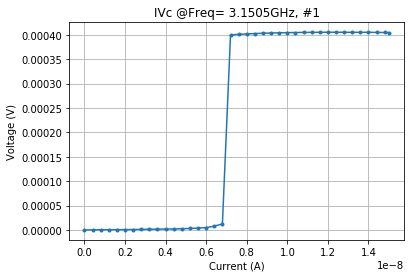

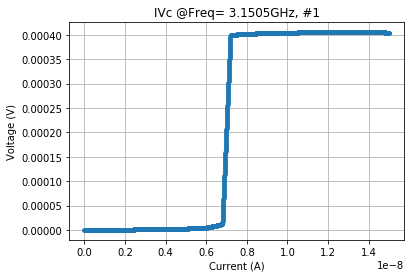

(3.1505, 6.8e-09)


In [81]:
sdata = splitXc(dataX=dataFreq, dataY=dataCurr, dataZ=dataVolt, itid = 1, itc = 77, sweep = 0)

plotXc ( dataX=sdata[0], dataY=sdata[1], dataZ=sdata[2], itid =sdata[3])

fitVolt = fitXc(sdata=sdata, fitCurrList = np.arange(0, 15e-9, 1e-12))
fitCurrList = np.arange(0, 15e-9, 1e-12)

plotXc ( dataX=sdata[0], dataY=fitCurrList, dataZ=fitVolt, itid =sdata[3])

print(searchXc(dataX=sdata[0], dataY=sdata[1], dataZ=sdata[2], Zthres = 50e-6))

In [82]:
# #either 6 or 15 uA
# for V in np.arange(0, 20, 1):
#     Zthres = V *1e-6
#     itc = 77
#     fitCurrStep = 1e-12

#     resultFreqLen = int(np.floor(len(dataFreq)/itc))
#     resultFreq = np.zeros(resultFreqLen)
#     resultCurr = np.zeros(resultFreqLen)
#     resultfitFreq = np.zeros(resultFreqLen)
#     resultfitCurr = np.zeros(resultFreqLen)
#     fitCurr = np.arange(dataCurr.min(), dataCurr.max(), fitCurrStep)

#     for i in range(resultFreqLen):
#         sdata = splitXc(dataX=dataFreq, dataY=dataCurr, dataZ=dataVolt, itid = i, itc = itc, sweep = 0 )
#         fitVolt = fitXc( sdata = sdata , fitCurrList = fitCurr )
#         resultFreq[i] = searchXc( dataX=sdata[0], dataY=sdata[1], dataZ=sdata[2], Zthres = Zthres )[0]
#         resultCurr[i] = searchXc( dataX=sdata[0], dataY=sdata[1], dataZ=sdata[2], Zthres = Zthres )[1]
#         resultfitFreq[i] = searchXc( dataX=sdata[0], dataY=fitCurr, dataZ=fitVolt, Zthres = Zthres )[0]
#         resultfitCurr[i] = searchXc( dataX=sdata[0], dataY=fitCurr, dataZ=fitVolt, Zthres = Zthres )[1]

#     fig, ax = plt.subplots()
#     ax.plot(resultFreq[:-1], resultCurr[:-1], '.', label = 'raw data')
#     ax.plot(resultfitFreq[:-1], resultfitCurr[:-1], '-', label = 'interpolated')
#     ax.set(xlabel='Freq (GHz)', ylabel='Ic (A)', title='Ic vs f @V={}uV'.format(V))
#     ax.set_ylim((0,10e-9))
#     ax.legend(loc=3)
#     ax.grid()
#     plt.show()
    
#     time.sleep(0.1+1)
#     clear_output(wait=True)

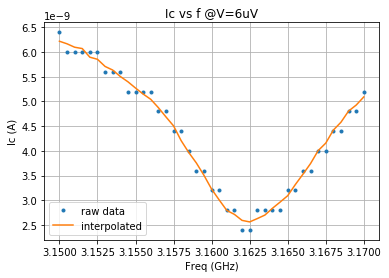

In [83]:
V = 6
Zthres = V *1e-6
itc = 77
fitCurrStep = 1e-12

resultFreqLen = int(np.floor(len(dataFreq)/itc))
resultFreq = np.zeros(resultFreqLen)
resultCurr = np.zeros(resultFreqLen)
resultfitFreq = np.zeros(resultFreqLen)
resultfitCurr = np.zeros(resultFreqLen)
fitCurr = np.arange(dataCurr.min(), dataCurr.max(), fitCurrStep)

for i in range(resultFreqLen):
    sdata = splitXc(dataX=dataFreq, dataY=dataCurr, dataZ=dataVolt, itid = i, itc = itc, sweep = 0 )
    fitVolt = fitXc( sdata = sdata , fitCurrList = fitCurr )
    resultFreq[i] = searchXc( dataX=sdata[0], dataY=sdata[1], dataZ=sdata[2], Zthres = Zthres )[0]
    resultCurr[i] = searchXc( dataX=sdata[0], dataY=sdata[1], dataZ=sdata[2], Zthres = Zthres )[1]
    resultfitFreq[i] = searchXc( dataX=sdata[0], dataY=fitCurr, dataZ=fitVolt, Zthres = Zthres )[0]
    resultfitCurr[i] = searchXc( dataX=sdata[0], dataY=fitCurr, dataZ=fitVolt, Zthres = Zthres )[1]

fig, ax = plt.subplots()
ax.plot(resultFreq[:-1], resultCurr[:-1], '.', label = 'raw data')
ax.plot(resultfitFreq[:-1], resultfitCurr[:-1], '-', label = 'interpolated')
ax.set(xlabel='Freq (GHz)', ylabel='Ic (A)', title='Ic vs f @V={}uV'.format(V))
# ax.set_ylim((0,10e-9))
ax.legend(loc=3)
ax.grid()
plt.show()

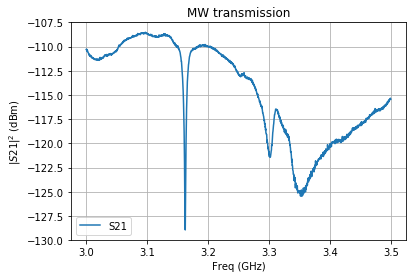

In [84]:
dataFreqMW = np.loadtxt(fnameMW, skiprows=8, usecols=0) / 1e9
dataMagnMW = np.loadtxt(fnameMW, skiprows=8, usecols=1) -97
dataMagnMWlinP = 10**(dataMagnMW/10)
dataMagnMWPdBmtWatt = 1e-3 * 10**(dataMagnMW/10)
dataMagnMWPdBmtWattIn = 1e-3 * 10**(-108.5/10) - dataMagnMWPdBmtWatt
dataMagnMWPdBmtuV = np.sqrt(0.05*dataMagnMWlinP) *1e6
dataMagnMWlinV = 10**(dataMagnMW/20)

# dataMagnMWlog = -10*np.log10(dataMagnMW*dataMagnMW)
fig, ax = plt.subplots()
ax.plot(dataFreqMW, dataMagnMW, '-', label = 'S21')

ax.set(xlabel='Freq (GHz)', ylabel='$|S21|^2$ (dBm)', title='MW transmission')
ax.legend(loc=3)
ax.grid()
plt.show()

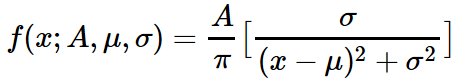

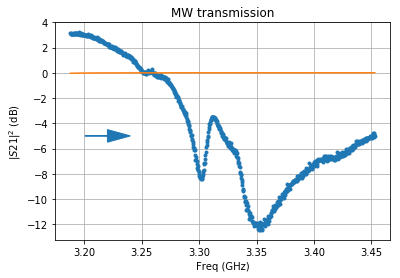

In [85]:
from numpy import loadtxt
from lmfit.models import LorentzianModel, GaussianModel

x = dataFreqMW[601:1451]
y = dataMagnMW[601:1451]+113
mod = GaussianModel()

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)
# print(out.fit_report(min_correl=0.25))

cA = -0.04200489*1.6
csigma = 0.00124032*0.95
cmu = 3.16234050
z = cA/np.pi*csigma/((x-cmu)**2+csigma**2)

fig, ax = plt.subplots()
ax.plot(x, y, '.', label = 'raw data')
# ax.plot(x, out.init_fit, '-', label = 'init fit')
# ax.plot(x, out.best_fit, '-', label = 'final fit')
ax.plot(x, z, '-', label = 'manual plot fit')

ax.set(xlabel='Freq (GHz)', ylabel='$|S21|^2$ (dB)', title='MW transmission')
ax.arrow(3.2, -5, 0.02, 0, head_length=0.02, head_width=1, fc = 'tab:blue', ec = 'tab:blue')

# ax.legend(loc=3)
ax.grid()
plt.show()

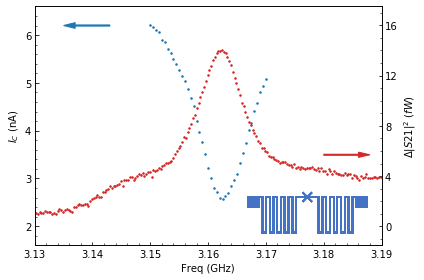

In [86]:
# fig, axL = plt.subplots()
# color = 'tab:blue'
# axL.set_xlabel('Freq (GHz)')
# axL.set_ylabel('$I_{C, 6\mu V}$ (A)', color=color)
# # axL.plot(resultFreq[:-1], resultCurr[:-1], '.', label = 'raw data', color=color)
# axL.plot(resultfitFreq[:-1], resultfitCurr[:-1], '.', label = 'DC measurement',color=color)
# axL.tick_params(axis='y', labelcolor=color)
# axL.set_xlim(left =3.12, right =3.20)
# axL.legend(loc=3)

# axR = axL.twinx()
# color = 'tab:pink'
# axR.set_ylabel('$|S21|^2_{linear}$ (pW)', color=color)
# axR.plot(dataFreqMW, dataMagnMWPdBmtWatt*1e12, '-', label = 'S21 power_linear @ -97dBm',color=color)
# axR.tick_params(axis='y', labelcolor=color)
# axR.legend(loc=1)
# fig.tight_layout()
# plt.show()

#############################
fig1, axL = plt.subplots()
color = 'tab:blue'
axL.set_xlabel('Freq (GHz)')
axL.set_ylabel('$I_{C}$ (nA)', color='black')
axL.plot(resultfitFreq[:-1], resultfitCurr[:-1]*1e9, '.', markersize=3, label = 'DC measurement',color=color)
axL.tick_params(axis='both', labelcolor='black', which='both', direction = 'in')
axL.minorticks_on()
axL.set_xlim(left =3.13, right =3.19)
axL.set_ylim(bottom =1.6, top =6.6)
axL.set_yticks(np.arange(2, 7, 1))
# axL.legend(loc=3)
axL.arrow(3.143, 6.2, -0.006, 0, head_length=0.002, head_width=0.12, width = 0.12*0.2, fc = color, ec = color)

imL = plt.imread("deviceinFig4.png")
rect = 0.58, 0.04, 0.28, 0.28
newax = fig1.add_axes(rect, anchor='NE', zorder=1)
newax.imshow(imL)
newax.axis('off')

# imRU = plt.imread("frame.png")
# # defining image position/size
# rect = 0.62, 0.63, 0.25, 0.25
# newax = fig1.add_axes(rect, anchor='NE', zorder=1)
# newax.imshow(imRU)
# newax.axis('off')

axR = axL.twinx()
color = 'tab:red'
axR.set_ylabel('$\Delta |S21|^2$ ($fW$)', color='black')
axR.plot(dataFreqMW, dataMagnMWPdBmtWattIn*1e15, '.', markersize=3, label = 'S21 loss @ -97dBm',color=color)
axR.tick_params(axis='y', labelcolor='black', which='both', direction = 'in')
axR.minorticks_on()
axR.set_ylim(bottom =-1.5, top =17.5)
axR.set_yticks(np.arange(0, 20, 4))
# axR.set_ylim(bottom =-0.0055, top =0.0095)
# axR.legend(loc=1)
axR.arrow(3.18, 5.7, 0.006, 0, head_length=0.002, head_width=0.42, width = 0.42*0.2, fc = color, ec = color)
fig1.tight_layout()
plt.savefig('Fig4.png', format='png', dpi=1000)
plt.show()

#############################
# fig2, axL = plt.subplots()
# color = 'tab:blue'
# axL.set_xlabel('Freq (GHz)')
# axL.set_ylabel('$I_{C, 6\mu V}$ (A)', color=color)
# axL.plot(resultfitFreq[:-1], resultfitCurr[:-1], '.', label = 'DC measurement',color=color)
# axL.tick_params(axis='y', labelcolor=color)
# axL.set_xlim(left =3.12, right =3.20)
# axL.legend(loc=3)

# axR = axL.twinx()
# color = 'tab:orange'
# axR.set_ylabel('$|S21|_{volt}$ ($\mu$V)', color=color)
# axR.plot(dataFreqMW, dataMagnMWPdBmtuV, '-', label = 'S21 volt_linear @ -97dBm',color=color)
# axR.tick_params(axis='y', labelcolor=color)
# axR.legend(loc=1)
# fig2.tight_layout()
# plt.show()

# #############################
# fig3, axL = plt.subplots()
# color = 'tab:blue'
# axL.set_xlabel('Freq (GHz)')
# axL.set_ylabel('$I_{C, 6\mu V}$ (A)', color=color)
# axL.plot(resultfitFreq[:-1], resultfitCurr[:-1], '.', label = 'DC measurement',color=color)
# axL.tick_params(axis='y', labelcolor=color)
# axL.set_xlim(left =3.12, right =3.20)
# axL.legend(loc=3)

# axR = axL.twinx()
# color = 'tab:red'
# axR.set_ylabel('$|S21|^2$ (dBm)', color=color)
# axR.plot(dataFreqMW, dataMagnMW, '-', label = 'S21 @ -97dBm',color=color)
# axR.tick_params(axis='y', labelcolor=color)
# axR.legend(loc=1)
# fig3.tight_layout()
# plt.show()

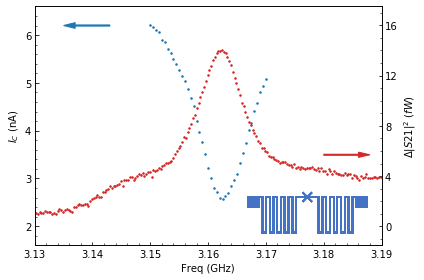

In [87]:
fig1, axL = plt.subplots()
color = 'tab:blue'
axL.set_xlabel('Freq (GHz)')
axL.set_ylabel('$I_{C}$ (nA)', color='black')
axL.plot(resultfitFreq[:-1], resultfitCurr[:-1]*1e9, '.', markersize=3, label = 'DC measurement',color=color)
axL.tick_params(axis='both', labelcolor='black', which='both', direction = 'in')
axL.minorticks_on()
axL.set_xlim(left =3.13, right =3.19)
axL.set_ylim(bottom =1.6, top =6.6)
axL.set_yticks(np.arange(2, 7, 1))
# axL.legend(loc=3)
axL.arrow(3.143, 6.2, -0.006, 0, head_length=0.002, head_width=0.12, width = 0.12*0.2, fc = color, ec = color)

imL = plt.imread("deviceinFig4.png")
rect = 0.58, 0.04, 0.28, 0.28
newax = fig1.add_axes(rect, anchor='NE', zorder=1)
newax.imshow(imL)
newax.axis('off')

axR = axL.twinx()
color = 'tab:red'
axR.set_ylabel('$\Delta |S21|^2$ ($fW$)', color='black')
axR.plot(dataFreqMW, dataMagnMWPdBmtWattIn*1e15, '.', markersize=3, label = 'S21 loss @ -97dBm',color=color)
axR.tick_params(axis='y', labelcolor='black', which='both', direction = 'in')
axR.minorticks_on()
axR.set_ylim(bottom =-1.5, top =17.5)
axR.set_yticks(np.arange(0, 20, 4))

axR.arrow(3.18, 5.7, 0.006, 0, head_length=0.002, head_width=0.42, width = 0.42*0.2, fc = color, ec = color)
fig1.tight_layout()
plt.savefig('Fig4.png', format='png', dpi=1000)
plt.show()

In [91]:
IcTXT=[resultfitFreq[:-1], resultfitCurr[:-1]*1e9]
np.savetxt("Ic.txt", np.transpose(IcTXT), fmt='%.6e', delimiter='\t', newline='\n', header='Freq (GHz)\tCurr (nA)', footer='', comments='', encoding=None)
PowerTXT=[dataFreqMW,dataMagnMWPdBmtWattIn*1e15]
np.savetxt("Power.txt", np.transpose(PowerTXT), fmt='%.6e', delimiter='\t', newline='\n', header='Freq (GHz)\tdel S21 (fW)', footer='', comments='', encoding=None)

In [89]:
dataMagnMWPdBmtWattIn*1e15

array([ 4.78276923,  4.69387554,  5.15663971, ..., 11.20901324,
       11.20029837, 11.28043899])

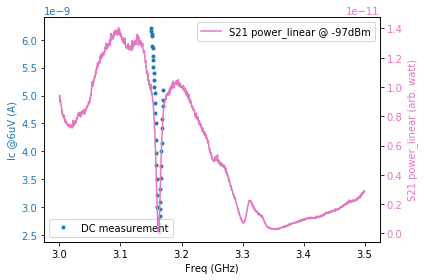

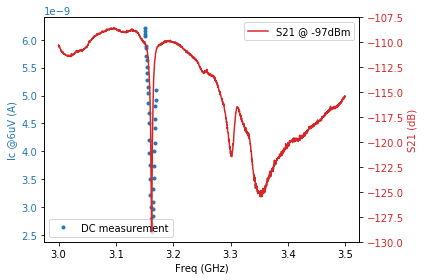

In [90]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Freq (GHz)')
ax1.set_ylabel('Ic @6uV (A)', color=color)
# ax1.plot(resultFreq[:-1], resultCurr[:-1], '.', label = 'raw data', color=color)
ax1.plot(resultfitFreq[:-1], resultfitCurr[:-1], '.', label = 'DC measurement',color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc=3)

ax2 = ax1.twinx()
color = 'tab:pink'
ax2.set_ylabel('S21 power_linear (arb. watt)', color=color)
ax2.plot(dataFreqMW, dataMagnMWlinP, '-', label = 'S21 power_linear @ -97dBm',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc=1)

fig.tight_layout()
plt.show()

fig1, ax3 = plt.subplots()

color = 'tab:blue'
ax3.set_xlabel('Freq (GHz)')
ax3.set_ylabel('Ic @6uV (A)', color=color)
ax3.plot(resultfitFreq[:-1], resultfitCurr[:-1], '.', label = 'DC measurement',color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.legend(loc=3)

ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('S21 (dB)', color=color)
ax4.plot(dataFreqMW, dataMagnMW, '-', label = 'S21 @ -97dBm',color=color)
ax4.tick_params(axis='y', labelcolor=color)
ax4.legend(loc=1)

fig1.tight_layout()
plt.show()